#### Simulaciones

In [591]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, group_delay, tf2zpk

def plot_filter_digital(b, a, fs):
    # Frecuencia de respuesta (para ver el módulo y fase del filtro)
    w, h = freqz(b, a, fs=fs)

    # w = w * fs / (2 * np.pi)

    # Mostrar el módulo y la fase del filtro
    plt.figure()

    plt.subplot(2, 1, 1)
    plt.plot(w, np.abs(h))
    plt.title('Módulo del filtro')
    plt.ylabel('Módulo')

    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h))
    plt.title('Fase del filtro')
    plt.ylabel('Fase (radianes)')
    plt.xlabel('Frecuencia (rad/muestra)')

    plt.tight_layout()

    w, gd = group_delay((b, a), fs=fs)

    # Graficar el retardo de grupo
    plt.figure()
    plt.plot(w, gd)
    plt.title('Retardo de grupo del filtro')
    plt.xlabel('Frecuencia (rad/muestra)')
    plt.ylabel('Retardo de grupo (muestras)')
    plt.grid()

    plt.tight_layout()

    plt.show()

def plot_filter_signal(b, a, input):
    # Aplicar el filtro a la señal rampa
    salida = lfilter(b, a, input)

    # Graficar señal de entrada y filtrada
    plt.figure()

    plt.subplot(2, 1, 1)
    plt.stem(input)
    plt.title('Señal de entrada')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    # plt.xlim((0, 100))
    # plt.legend()

    plt.subplot(2, 1, 2)
    plt.stem(salida)
    plt.title('Señal filtrada')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    # plt.xlim((0, 100))
    # plt.legend()

    plt.show()

def zplane(b, a):
    """ Plot the complex z-plane given a transfer function """
    # Compute zeros and poles
    zeros, poles, gain = tf2zpk(b, a)

    # Plot unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    unit_circle = np.exp(1j*theta)
    plt.plot(np.real(unit_circle), np.imag(unit_circle), 'b--')  # Unit circle

    # Plot zeros and poles
    plt.scatter(np.real(zeros), np.imag(zeros), s=50, facecolors='none', edgecolors='r', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), s=50, facecolors='none', edgecolors='b', label='Poles')

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid()
    plt.legend()
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Poles and Zeros')
    plt.axis('equal')
    plt.show()

In [592]:
# Parámetros de la señal senoidal
fs = 1000
# frecuencia = 50/fs  # Frecuencia de la señal en Hz
frecuencia = 50
t = np.arange(0, .1, 1/fs)  # Vector de tiempo de 1 segundo
amplitud = 1  # Amplitud de la señal
fase = 0  # Fase inicial en radianes


# Generar señal senoidal
senoidal = amplitud * np.sin(2 * np.pi * frecuencia * t + fase)

### Promediador

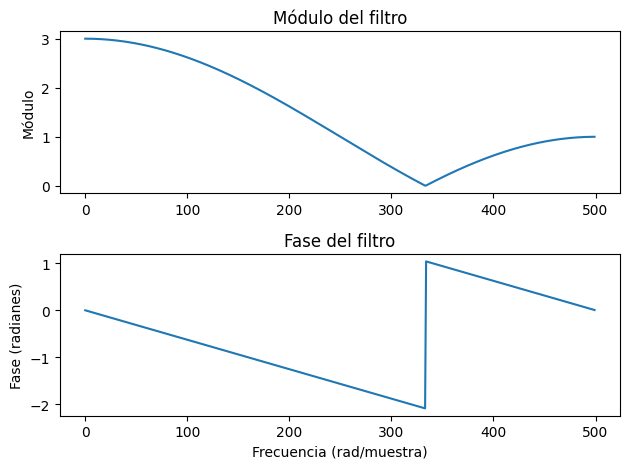

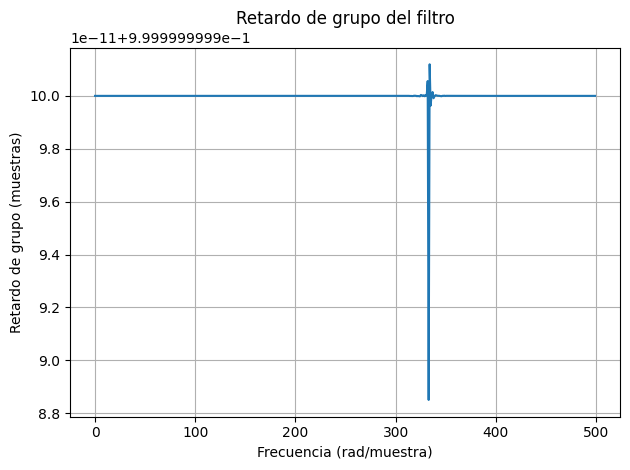

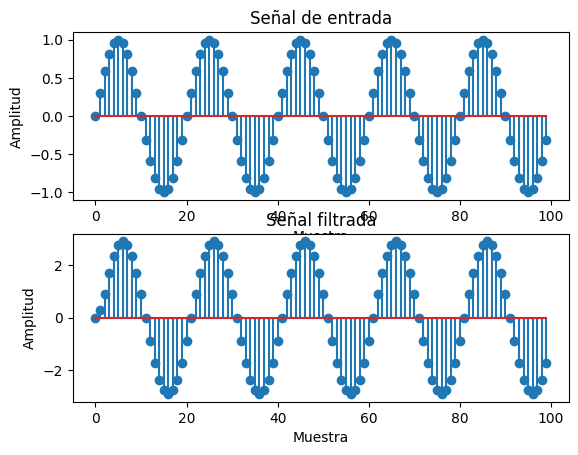

In [603]:
b = [1,1,1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

N = len(senoidal)


/home/xxx/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: divide by zero encountered in divide
  gd = np.real(num / den) - a.size + 1
/home/xxx/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
/tmp/ipykernel_10988/1324583376.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


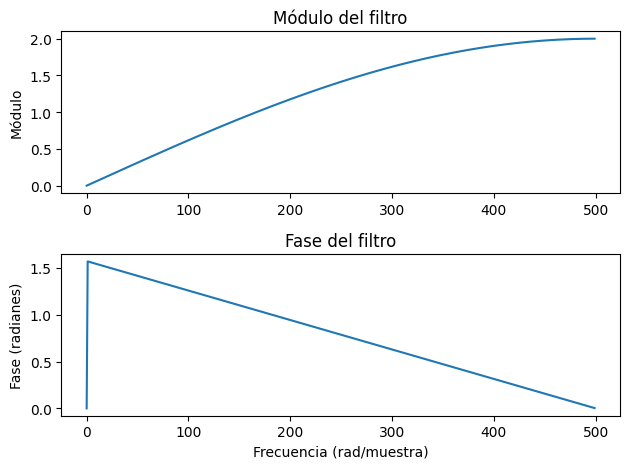

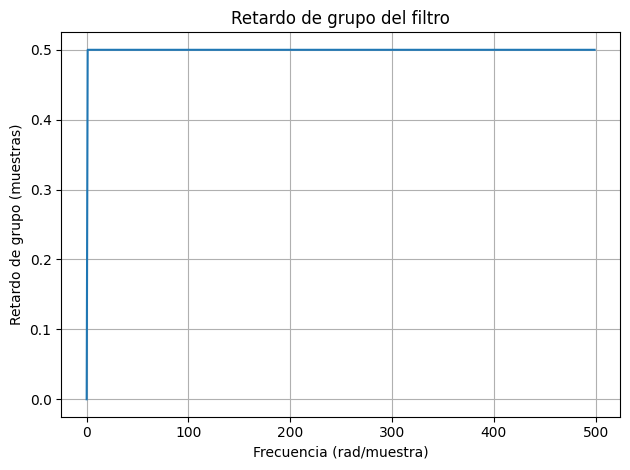

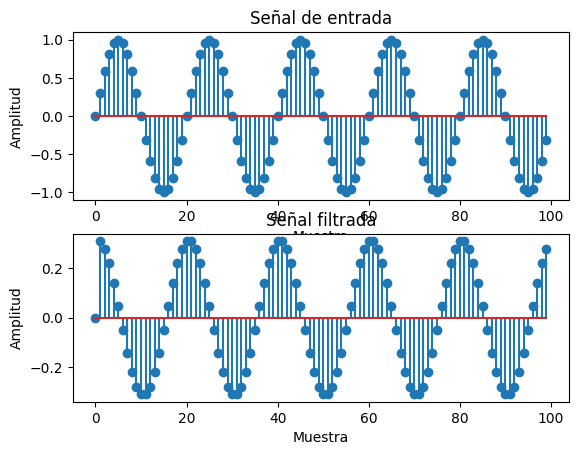

In [594]:
b = [1,-1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

### Verificacion de diferenciador de segundo orden

/tmp/ipykernel_10988/1324583376.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


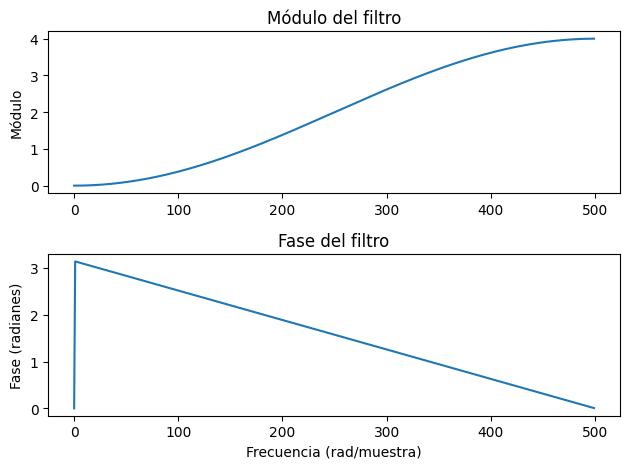

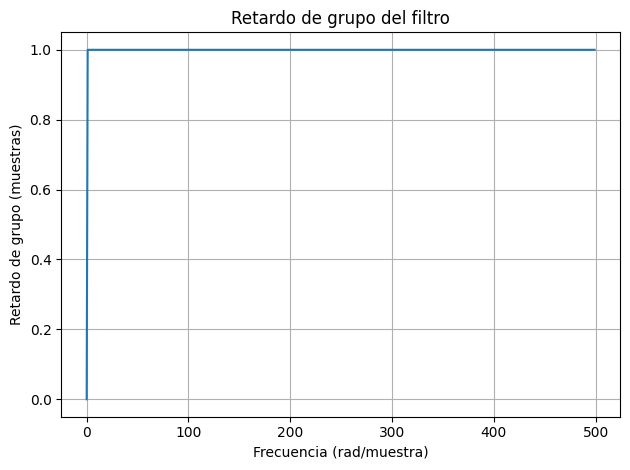

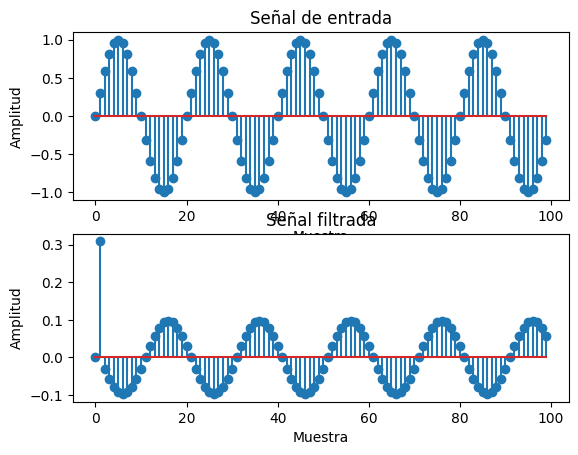

In [595]:
b = [1, -2, 1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

### Integrador con pérdidas

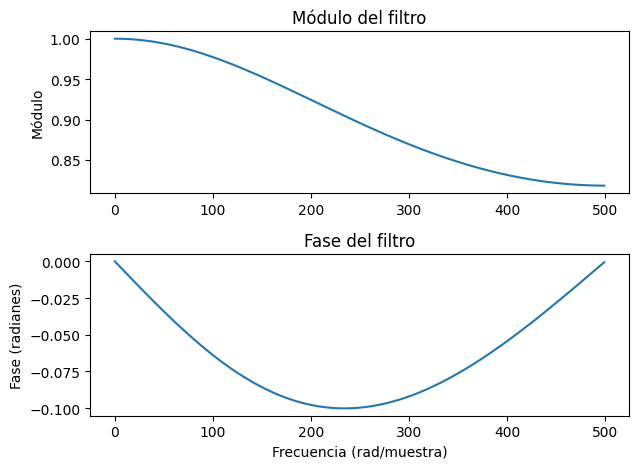

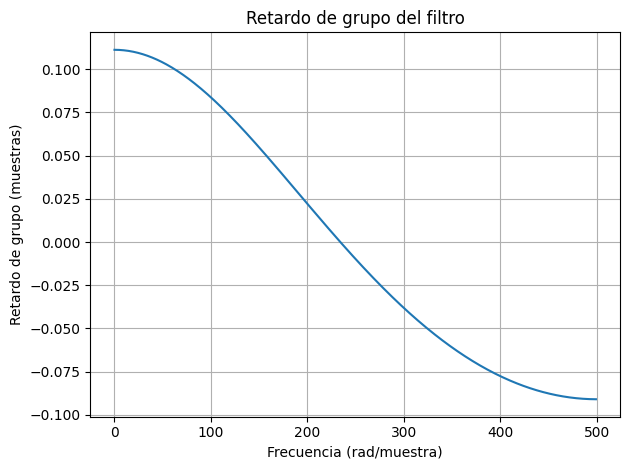

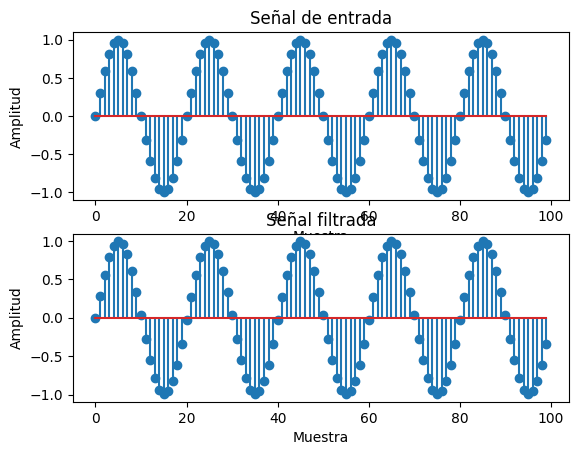

In [596]:
b = [.9]
a = [1, -.1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

### Filtro elimina continua.

/tmp/ipykernel_10988/1324583376.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


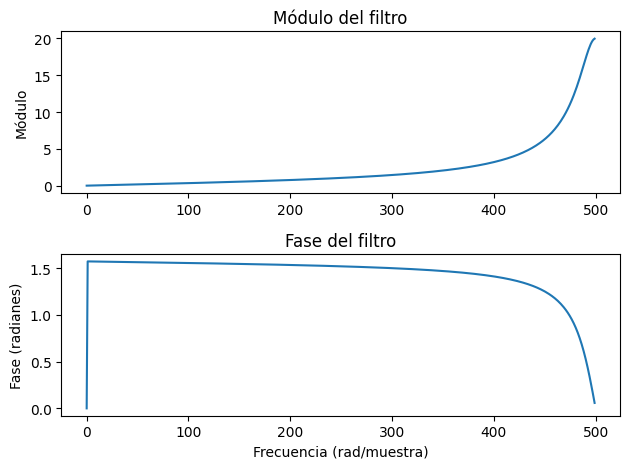

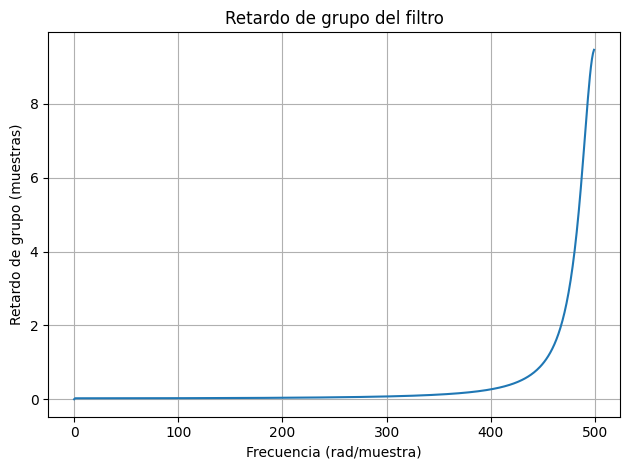

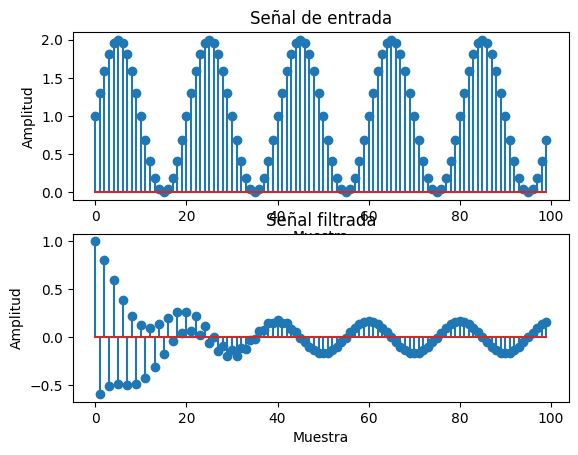

In [597]:
DC = 1

b = [1,-1]
a = [1,.9]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal + DC)

### Filtro ecualizador de fase de 1º orden.

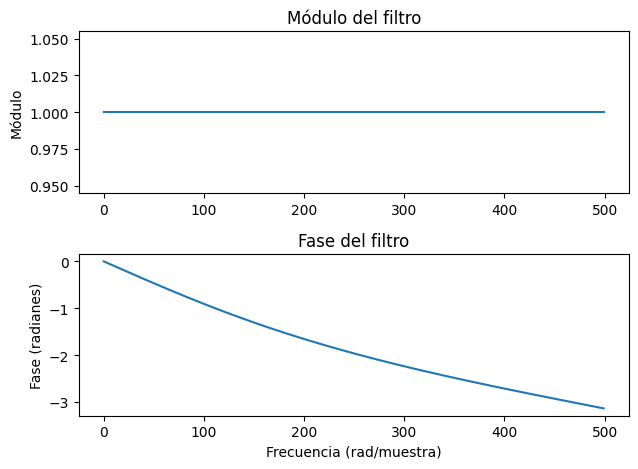

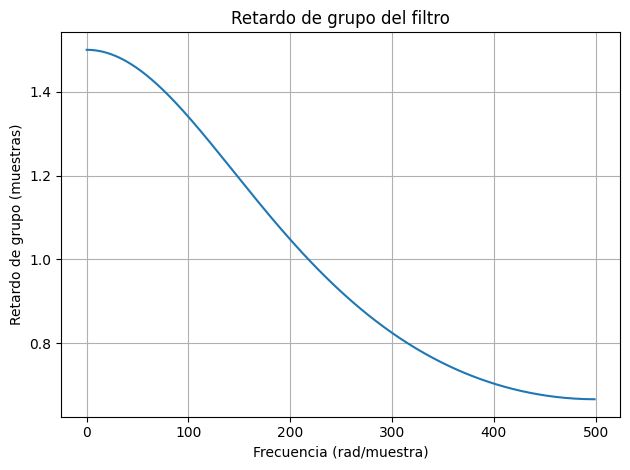

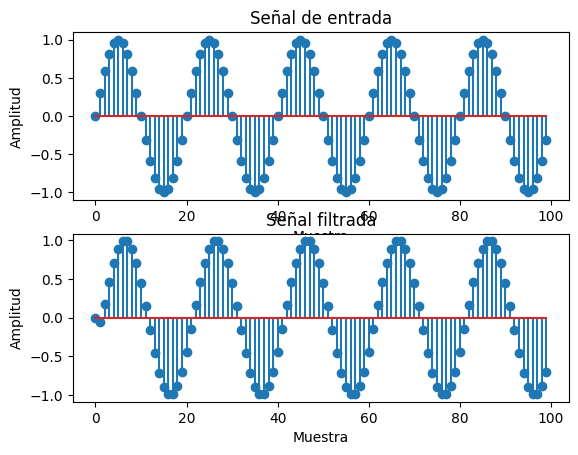

In [598]:
D = 0.5
R = -D/(D+2)

b = [R, 1]
a = [1, R]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)

### Ej2a)

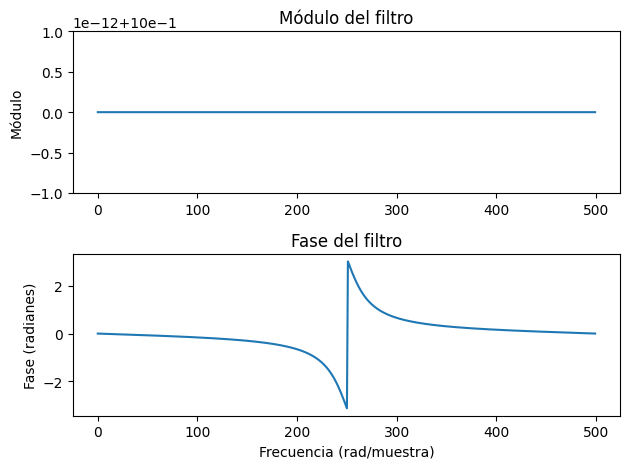

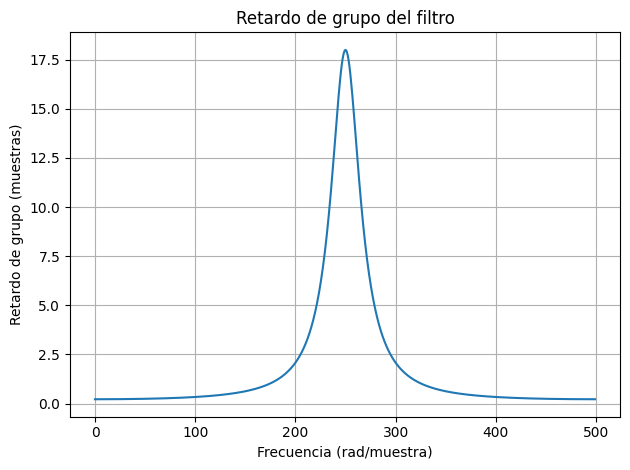

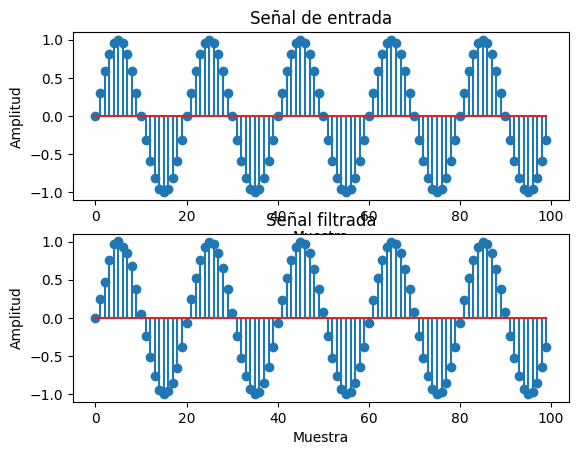

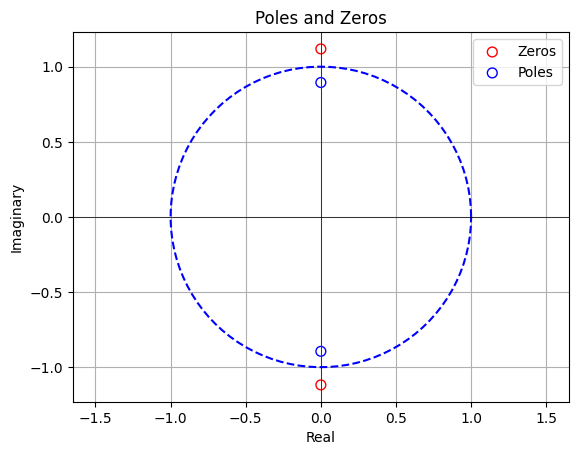

In [601]:
b = [.8, 0, 1]
a = [1, 0, .8]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)
zplane(b,a)

### Ej2b)

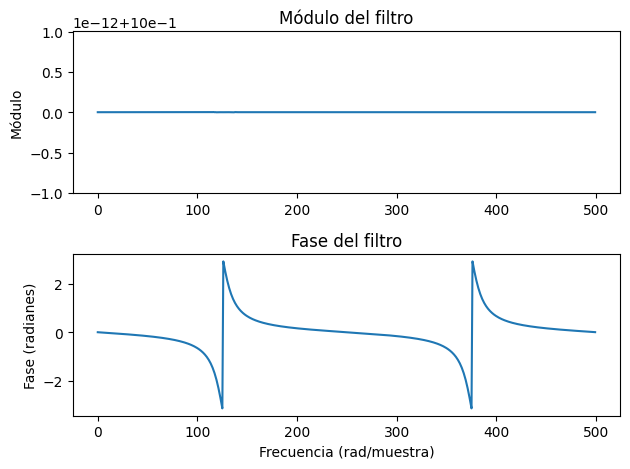

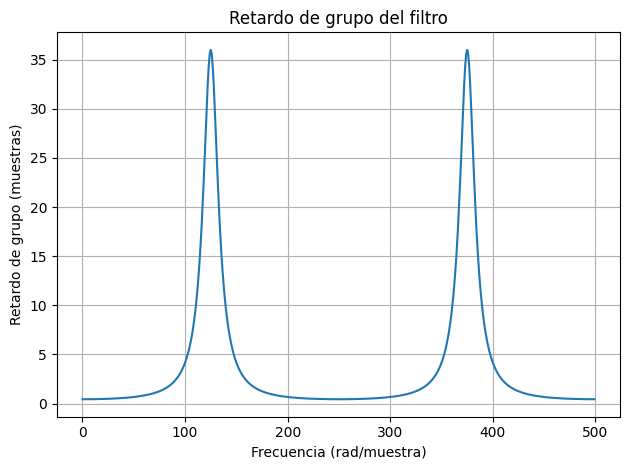

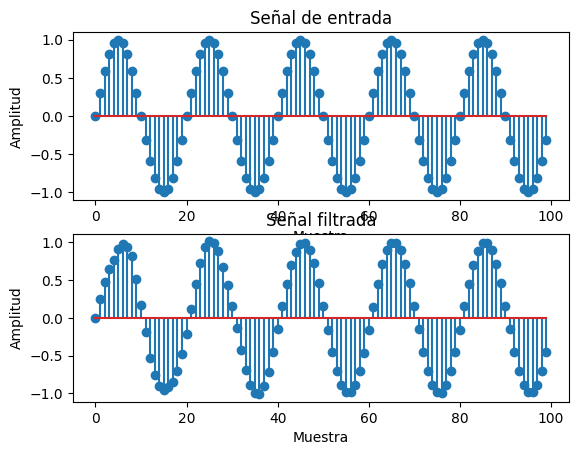

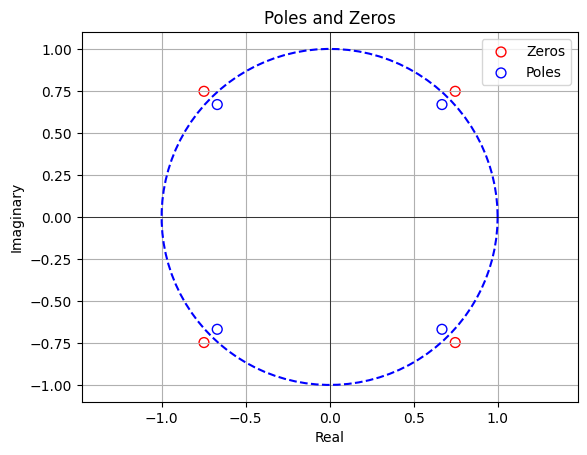

In [600]:
b = [.8, 0, 0, 0, 1]
a = [1, 0, 0, 0, .8]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, senoidal)
zplane(b,a)